# Basic Processing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_theme()

customPalette = ['#3A005A', '#00A651', '#000000', '#8A2BE2', '#5D3FD3', '#32CD32']


In [5]:
df = pd.read_csv('./data/bike_sales_100k.csv')

df.head()

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female


In [3]:
df.describe()

,Sale_ID,Customer_ID,Price,Quantity,Salesperson_ID,Customer_Age
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5495.450720,2598.182340,2.997110,549.906300,44.043410
std,28867.657797,2598.873948,1384.943133,1.414235,259.679221,15.313761
min,1.000000,1000.000000,200.010000,1.000000,100.000000,18.000000
25%,25000.750000,3249.000000,1399.787500,2.000000,324.000000,31.000000
50%,50000.500000,5491.000000,2598.575000,3.000000,550.000000,44.000000
75%,75000.250000,7738.000000,3795.982500,4.000000,775.000000,57.000000
max,100000.000000,9999.000000,4999.810000,5.000000,999.000000,70.000000


# Revenue Analysis

In [6]:
# Total revenue
df['Revenue'] = df['Price'] * df['Quantity']

# Revenue by D/M/Y
df['DMY'] = pd.to_datetime(df['Date'], dayfirst=True)

# Just getting month and year
df['Month'] = df['DMY'].dt.month
df['Year'] = df['DMY'].dt.year

## Revenue by year

In [9]:
revenue_by_year = df.groupby(['Year'])['Revenue'].apply(lambda x: x.sum()).reset_index()

revenue_by_year.head()

,Year,Revenue
0,2020,1.642245e+08
1,2021,1.635352e+08
2,2022,1.655607e+08
3,2023,1.644976e+08
4,2024,1.206162e+08


/tmp/ipykernel_39477/3723794593.py:1: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=revenue_by_year, x='Year', y='Revenue', hue='Year', palette=customPalette, legend=False)


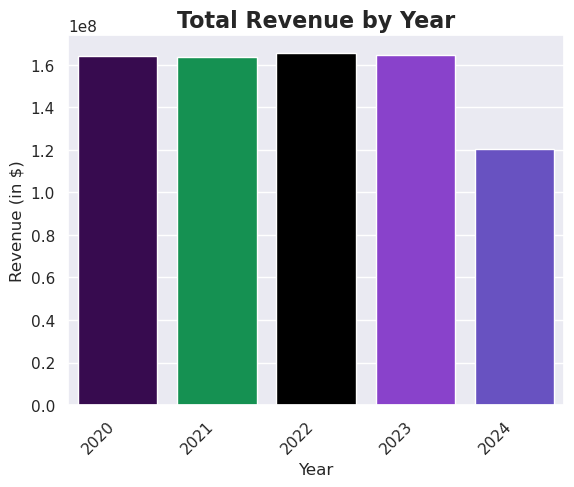

In [24]:
sns.barplot(data=revenue_by_year, x='Year', y='Revenue', hue='Year', palette=customPalette, legend=False)

plt.xticks(rotation=45, ha='right')

plt.title('Total Revenue by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue (in $)', fontsize=12)

plt.savefig('revenue_by_year.png')

plt.show()

## Revenue by month

In [8]:
revenue_by_month = df.groupby(['Month'])['Revenue'].apply(lambda x: x.sum()).reset_index()

revenue_by_month.head()

,Month,Revenue
0,1,68910700.99
1,2,63598916.50
2,3,69748846.00
3,4,67673582.03
4,5,69890399.71


/tmp/ipykernel_42175/1399041938.py:1: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=revenue_by_month, x='Month', y='Revenue', hue='Month', palette=customPalette, legend=False)


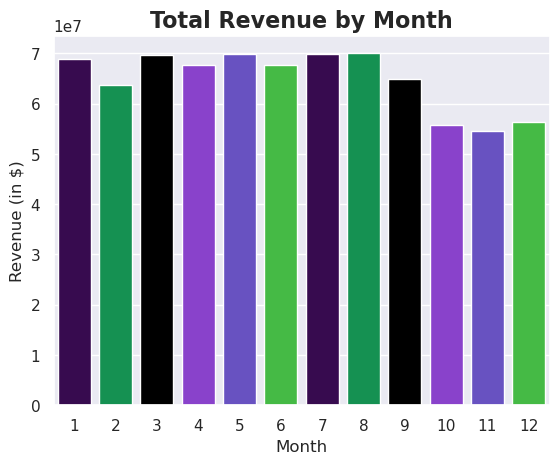

In [10]:
sns.barplot(data=revenue_by_month, x='Month', y='Revenue', hue='Month', palette=customPalette, legend=False)

plt.title('Total Revenue by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (in $)', fontsize=12)

plt.savefig('revenue_by_month.png')

plt.show()